In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
import random
from PIL import Image, ImageEnhance
import keras
from datetime import datetime

from tensorflow.keras.layers import  Input, Conv2D, BatchNormalization, Activation, Lambda, Subtract, ZeroPadding2D, GlobalAveragePooling2D, Dense, Add, Concatenate, UpSampling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input 
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape, Dense 

from tensorflow.keras.models import Model 
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg

In [2]:
from keras.applications.resnet import ResNet50

In [38]:
train_raw = r"C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\train_gbc\Raw"
train_lbl = r"C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\train_gbc\Mask"
test_raw = r"C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\test_gbc\Raw"
test_lbl = r"C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\test_gbc\Mask"
all_raw = r"C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\main_train\raw"
all_mask = r"C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\main_train\mask"

In [39]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [40]:
walk_through_dir(train_raw)

There are 0 directories and 66 images in 'C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\train_gbc\Raw'.


In [41]:
walk_through_dir(train_lbl)

There are 0 directories and 66 images in 'C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\train_gbc\Mask'.


In [42]:
walk_through_dir(test_raw)

There are 0 directories and 69 images in 'C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\test_gbc\Raw'.


In [43]:
walk_through_dir(test_lbl)

There are 0 directories and 69 images in 'C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\test_gbc\Mask'.


In [44]:
walk_through_dir(all_raw)

There are 0 directories and 135 images in 'C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\main_train\raw'.


In [45]:
walk_through_dir(all_mask)

There are 0 directories and 135 images in 'C:\Users\vpgni\Desktop\FYP_GBC\GBC_Dataset\main_train\mask'.


In [10]:
tr_img_list = os.listdir(train_raw_aug)
tr_mask_list = os.listdir(train_lbl_aug)

print(tr_img_list, len(tr_img_list))
print(tr_mask_list, len(tr_mask_list))

['10_aug_rot_0.tif', '10_aug_rot_0_aug_rl.tif', '10_aug_rot_0_aug_rl_aug_tb.tif', '10_aug_rot_0_aug_tb.tif', '10_aug_rot_1.tif', '10_aug_rot_1_aug_rl.tif', '10_aug_rot_1_aug_rl_aug_tb.tif', '10_aug_rot_1_aug_tb.tif', '10_aug_rot_2.tif', '10_aug_rot_2_aug_rl.tif', '10_aug_rot_2_aug_rl_aug_tb.tif', '10_aug_rot_2_aug_tb.tif', '10_aug_rot_3.tif', '10_aug_rot_3_aug_rl.tif', '10_aug_rot_3_aug_rl_aug_tb.tif', '10_aug_rot_3_aug_tb.tif', '10_aug_rot_4.tif', '10_aug_rot_4_aug_rl.tif', '10_aug_rot_4_aug_rl_aug_tb.tif', '10_aug_rot_4_aug_tb.tif', '12_aug_rot_0.tif', '12_aug_rot_0_aug_rl.tif', '12_aug_rot_0_aug_rl_aug_tb.tif', '12_aug_rot_0_aug_tb.tif', '12_aug_rot_1.tif', '12_aug_rot_1_aug_rl.tif', '12_aug_rot_1_aug_rl_aug_tb.tif', '12_aug_rot_1_aug_tb.tif', '12_aug_rot_2.tif', '12_aug_rot_2_aug_rl.tif', '12_aug_rot_2_aug_rl_aug_tb.tif', '12_aug_rot_2_aug_tb.tif', '12_aug_rot_3.tif', '12_aug_rot_3_aug_rl.tif', '12_aug_rot_3_aug_rl_aug_tb.tif', '12_aug_rot_3_aug_tb.tif', '12_aug_rot_4.tif', '12_aug

In [11]:
te_img_list = os.listdir(test_raw)
te_mask_list = os.listdir(test_lbl)

print(te_img_list)
print(te_mask_list)

['1.tif', '10.tif', '11.tif', '12.tif', '13.tif', '14.tif', '15.tif', '16.tif', '17.tif', '18.tif', '19.tif', '2.tif', '20.tif', '21.tif', '22.tif', '23.tif', '24.tif', '25.tif', '26.tif', '28.tif', '29.tif', '3.tif', '30.tif', '32.tif', '33.tif', '34.tif', '35.tif', '36.tif', '37.tif', '39.tif', '4.tif', '40.tif', '41.tif', '42.tif', '43.tif', '44.tif', '45.tif', '46.tif', '47.tif', '48.tif', '49.tif', '5.tif', '50.tif', '51.tif', '52.tif', '53.tif', '54.tif', '55.tif', '56.tif', '57.tif', '58.tif', '59.tif', '6.tif', '61.tif', '62.tif', '63.tif', '64.tif', '65.tif', '66.tif', '67.tif', '68.tif', '69.tif', '7.tif', '70.tif', '71.tif', '72.tif', '73.tif', '8.tif', '9.tif']
['1.tif', '10.tif', '11.tif', '12.tif', '13.tif', '14.tif', '15.tif', '16.tif', '17.tif', '18.tif', '19.tif', '2.tif', '20.tif', '21.tif', '22.tif', '23.tif', '24.tif', '25.tif', '26.tif', '28.tif', '29.tif', '3.tif', '30.tif', '32.tif', '33.tif', '34.tif', '35.tif', '36.tif', '37.tif', '39.tif', '4.tif', '40.tif', '

In [46]:
#function to display random images from the directories
def display_img(img_dir, num):
    img_list = os.listdir(img_dir)
    im_path = os.path.join(img_dir, img_list[num])
    im = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)
    im = cv2.resize(im, (1024, 1024), interpolation=cv2.INTER_AREA)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("Shape of the image: ", im.shape)
    print("Image Name: ", img_list[num])

In [64]:
import random
n = random.randint(0, len(os.listdir(all_raw))-1)
n

4

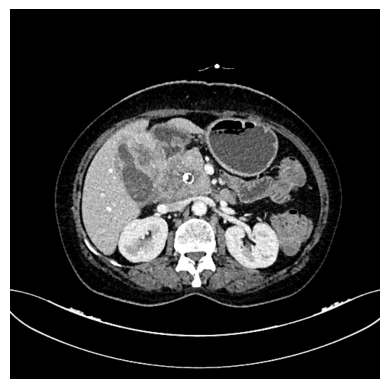

Shape of the image:  (1024, 1024, 4)
Image Name:  1 (102).tif


In [65]:
#displaying the original image
display_img(img_dir=all_raw, num=n)

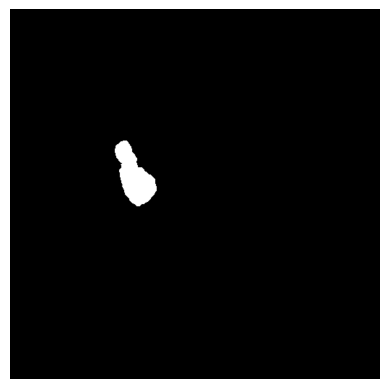

Shape of the image:  (1024, 1024, 3)
Image Name:  2 (102).tif


In [66]:
#displaying the mask
display_img(img_dir=all_mask, num=n)

In [67]:
#function to create dataset
SIZE = 256
def create_dataset(image_dir, im_col=1):
    img_array = []
    img_list = os.listdir(image_dir)
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'tif'):
            #print(image_directory+image_name)
            image = cv2.imread(os.path.join(image_dir, img_list[i]), im_col)
            image = Image.fromarray(image)
            img_array.append(np.array(image))
    return np.array(img_array)

In [68]:
img_dataset = create_dataset(all_raw, im_col=3)
mask_dataset = create_dataset(all_mask, im_col=0)

In [71]:
mask_dataset.sum()/66

4133.227272727273

In [70]:
img_dataset = img_dataset/255.
mask_dataset = np.expand_dims(mask_dataset, -1)/255.

In [72]:
img_dataset.shape, mask_dataset.shape

((135, 512, 512, 3), (135, 512, 512, 1))

In [73]:
print(len(img_dataset), len(mask_dataset))

135 135


In [74]:
# splitting the dataset into training and validation datasets

from sklearn.model_selection import train_test_split
X_pretrain, X_val, y_pretrain, y_val = train_test_split(img_dataset, mask_dataset, test_size = 0.10, random_state = 42)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_pretrain, y_pretrain, test_size = 0.10, random_state = 42)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(108, 512, 512, 3)
(108, 512, 512, 1)
(13, 512, 512, 3)
(13, 512, 512, 1)
(14, 512, 512, 3)
(14, 512, 512, 1)


In [89]:
def dice_loss1(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = tf.float32(K.flatten(y_pred>0.5))
    intersection = K.sum(y_true_f * y_pred_f)
    return 1-((2.0 * intersection + 1e-6) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1e-6))


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef1(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = tf.float32(K.flatten(y_pred>0.5))
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1e-6) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1e-6)


def expend_as(tensor, rep):
     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

In [100]:
def SqueezeAndExcite(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init) 
    se = Reshape(se_shape)(se) 
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = init * se 
    return x 


def Generate_skip_Connection(Encoder): 
    skips = [ ] 
    # image_features = Encoder.get_layer('conv5_block3_out').output 
    # skips.append(image_features) 
    image_features = Encoder.get_layer('conv4_block6_out').output
    skips.append(image_features) 
    image_features = Encoder.get_layer('conv3_block4_out').output
    skips.append(image_features) 
    image_features = Encoder.get_layer('conv2_block3_out').output 
    skips.append(image_features) 
    image_features = Encoder.get_layer('conv1_relu').output
    skips.append(image_features)  
    return skips 
    




def UNet(shape, num_classes=1):
    inputs = Input(shape=shape, name='Image_input')
    encoder = ResNet50(weights="imagenet", include_top=False,input_tensor=inputs)
    
    skip = Generate_skip_Connection(encoder) 
    #shape= [e.shape for e in skip] 

    output = encoder.get_layer('conv5_block3_out').output  
    x = UpSampling2D(size=(2,2), interpolation="bilinear")(output) 
    
    temp = skip[0] 
    x = Concatenate()([x, temp])
    x = SqueezeAndExcite(x) 

    x = Conv2D(filters=512, kernel_size=3, padding='same', use_bias=False)(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = UpSampling2D(size=(2,2), interpolation='bilinear')(x) 
    temp = skip[1] 
    x = Concatenate()([x, temp]) 
    x = SqueezeAndExcite(x) 

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x) 
    x = BatchNormalization()(x) 
    x = Activation('relu')(x) 

    x = UpSampling2D(size=(2,2), interpolation='bilinear')(x) 
    temp = skip[2] 
    x = Concatenate()([x, temp]) 
    x = SqueezeAndExcite(x) 

    x = Conv2D(filters=64, kernel_size=3, padding='same', use_bias=False)(x) 
    x = BatchNormalization()(x) 
    x = Activation('relu')(x) 

    x = UpSampling2D(size=(2, 2), interpolation='bilinear')(x) 
    temp = skip[3] 
    x = Concatenate()([x, temp]) 
    x = SqueezeAndExcite(x) 

    
    x = Conv2D(filters=64, kernel_size=3, padding='same', use_bias=False)(x) 
    x = BatchNormalization()(x) 
    x = Activation('relu')(x) 

    x = UpSampling2D(size=(2, 2), interpolation='bilinear')(x) 
    x = SqueezeAndExcite(x) 

    x = Conv2D(filters=32, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=num_classes, kernel_size=1)(x)
    activation = 'sigmoid' if num_classes ==1 else 'softmax'
    x = Activation(activation)(x)
    
    model = Model(inputs, x) 
    return model 



if __name__ == "__main__":
    input_shape = (512, 512, 3)
    model = UNet(input_shape)
    model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_input (InputLayer)       [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['Image_input[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

 conv2_block2_add (Add)         (None, 128, 128, 25  0           ['conv2_block1_out[0][0]',       
                                6)                                'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, 128, 128, 25  0           ['conv2_block2_add[0][0]']       
                                6)                                                                
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 128, 128, 64  16448       ['conv2_block2_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 128, 128, 64  256        ['conv2_block3_1_conv[0][0]']    
 ization) 

 conv3_block2_3_conv (Conv2D)   (None, 64, 64, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, 64, 64, 512)  2048       ['conv3_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_add (Add)         (None, 64, 64, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 64, 64, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_blo

                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 32, 32, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 32, 32, 1024  4096       ['conv4_block1_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_add (Add)         (None, 32, 32, 1024  0           ['conv4_block1_0_bn[0][0]',      
                                )                                 'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 32, 32, 1024  263168      ['conv4_block4_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, 32, 32, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block4_add (Add)         (None, 32, 32, 1024  0           ['conv4_block3_out[0][0]',       
                                )                                 'conv4_block4_3_bn[0][0]']      
          

 conv5_block1_2_relu (Activatio  (None, 16, 16, 512)  0          ['conv5_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_0_conv (Conv2D)   (None, 16, 16, 2048  2099200     ['conv4_block6_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv5_block1_3_conv (Conv2D)   (None, 16, 16, 2048  1050624     ['conv5_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 16, 16, 2048  8192       ['conv5_block1_0_conv[0][0]']    
 ization) 

 global_average_pooling2d_25 (G  (None, 3072)        0           ['concatenate_20[0][0]']         
 lobalAveragePooling2D)                                                                           
                                                                                                  
 reshape_25 (Reshape)           (None, 1, 1, 3072)   0           ['global_average_pooling2d_25[0][
                                                                 0]']                             
                                                                                                  
 dense_50 (Dense)               (None, 1, 1, 384)    1179648     ['reshape_25[0][0]']             
                                                                                                  
 dense_51 (Dense)               (None, 1, 1, 3072)   1179648     ['dense_50[0][0]']               
                                                                                                  
 tf.math.m

 reshape_28 (Reshape)           (None, 1, 1, 128)    0           ['global_average_pooling2d_28[0][
                                                                 0]']                             
                                                                                                  
 dense_56 (Dense)               (None, 1, 1, 16)     2048        ['reshape_28[0][0]']             
                                                                                                  
 dense_57 (Dense)               (None, 1, 1, 128)    2048        ['dense_56[0][0]']               
                                                                                                  
 tf.math.multiply_28 (TFOpLambd  (None, 256, 256, 12  0          ['concatenate_23[0][0]',         
 a)                             8)                                'dense_57[0][0]']               
                                                                                                  
 conv2d_33

In [101]:
#setting up the parameter values

# input data
INPUT_SIZE = 256
INPUT_CHANNEL = 3   # 1-grayscale, 3-RGB scale
OUTPUT_MASK_CHANNEL = 1

# network structure
FILTER_NUM = 32 # number of basic filters for the first layer
FILTER_SIZE = 3 # size of the convolutional filter
DOWN_SAMP_SIZE = 2 # size of pooling filters
UP_SAMP_SIZE = 2 # size of upsampling filters

# network hyper-parameter
DROPOUT_RATE = 0
BATCH_NORM_FLAG = True

In [102]:
def dice_coef(y_true, y_pred):
    smooth=1e-3
    y_true_f = tf.compat.v1.layers.flatten(y_true)
    y_pred_f = tf.compat.v1.layers.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred) 

def iou(y_true, y_pred):
    smooth=1e-3
    y_true_f = tf.compat.v1.layers.flatten(y_true) 
    y_pred_f = tf.compat.v1.layers.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

In [103]:
from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({'dice_loss': dice_loss})
get_custom_objects().update({'dice_coef': dice_coef})

In [104]:
ARU_model = UNet(shape=(512, 512, 3), num_classes=1)

# compile the model
ARU_model.compile(loss=dice_loss,
                  optimizer=Adam(2e-3),
                  metrics=[dice_coef])

In [105]:
#train the model along with time of execution
start = datetime.now()

ARU_model_history = ARU_model.fit(X_train,
                                  y_train,
                                  verbose=1,
                                  batch_size = 8,
                                  validation_data=(X_val, y_val), 
                                  shuffle=True,
                                  epochs=100)

stop = datetime.now()

#Execution time of the model 
execution_time_att_Unet_from_scratch = stop-start
print("Attention ResUNet from scratch execution time is: ", execution_time_att_Unet_from_scratch)

ARU_model.save(r'C:\Users\vpgni\Desktop\FYP_GBC\Unet_model_1.hdf5')

Epoch 1/100
14/14 [==============================] - 11s 384ms/step - loss: 0.9406 - dice_coef: 0.0606 - val_loss: 0.9859 - val_dice_coef: 0.0140
Epoch 2/100
14/14 [==============================] - 4s 289ms/step - loss: 0.8910 - dice_coef: 0.1080 - val_loss: 0.9859 - val_dice_coef: 0.0140
Epoch 3/100
14/14 [==============================] - 4s 291ms/step - loss: 0.8231 - dice_coef: 0.1814 - val_loss: 0.9855 - val_dice_coef: 0.0144
Epoch 4/100
14/14 [==============================] - 4s 289ms/step - loss: 0.7151 - dice_coef: 0.2887 - val_loss: 0.9827 - val_dice_coef: 0.0171
Epoch 5/100
14/14 [==============================] - 4s 287ms/step - loss: 0.5437 - dice_coef: 0.4619 - val_loss: 0.9996 - val_dice_coef: 3.4694e-04
Epoch 6/100
14/14 [==============================] - 4s 294ms/step - loss: 0.3732 - dice_coef: 0.6314 - val_loss: 1.0000 - val_dice_coef: 7.2466e-09
Epoch 7/100
14/14 [==============================] - 4s 294ms/step - loss: 0.2459 - dice_coef: 0.7542 - val_loss: 0.9889 

14/14 [==============================] - 4s 300ms/step - loss: 0.0264 - dice_coef: 0.9733 - val_loss: 0.9837 - val_dice_coef: 0.0190
Epoch 57/100
14/14 [==============================] - 4s 296ms/step - loss: 0.0269 - dice_coef: 0.9725 - val_loss: 0.9964 - val_dice_coef: 0.0037
Epoch 58/100
14/14 [==============================] - 4s 292ms/step - loss: 0.0317 - dice_coef: 0.9685 - val_loss: 0.9156 - val_dice_coef: 0.0862
Epoch 59/100
14/14 [==============================] - 4s 296ms/step - loss: 0.0307 - dice_coef: 0.9695 - val_loss: 0.9872 - val_dice_coef: 0.0123
Epoch 60/100
14/14 [==============================] - 4s 297ms/step - loss: 0.0259 - dice_coef: 0.9741 - val_loss: 0.9436 - val_dice_coef: 0.0572
Epoch 61/100
14/14 [==============================] - 4s 303ms/step - loss: 0.0222 - dice_coef: 0.9777 - val_loss: 0.9691 - val_dice_coef: 0.0319
Epoch 62/100
14/14 [==============================] - 4s 303ms/step - loss: 0.0212 - dice_coef: 0.9782 - val_loss: 0.9131 - val_dice_coef

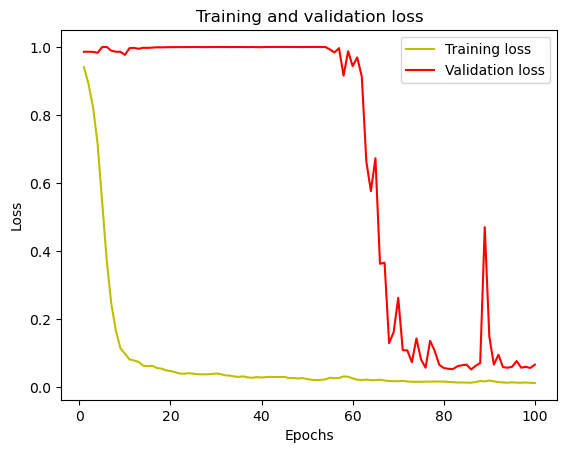

In [106]:
# convert the history.history dict to pandas dict DataFrame and save as csv for future plotting
ARU_model_df = pd.DataFrame(ARU_model_history.history) 

with open('ARU_model_df.csv', mode='w') as f:
    ARU_model_df.to_csv(f)


#display the history for val_loss and loss
history = ARU_model_history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [120]:
def dice_coef(y_true, y_pred):
    y_true_f = tf.compat.v1.layers.flatten(y_true)
    y_pred_f = tf.compat.v1.layers.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred) 

def iou(y_true, y_pred):
    y_true_f = tf.compat.v1.layers.flatten(y_true) 
    y_pred_f = tf.compat.v1.layers.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

In [107]:
# load model
model = tf.keras.models.load_model(r'C:\Users\vpgni\Desktop\FYP_GBC\Unet_model_1.hdf5')

1/1 [==============================] - 0s 44ms/step


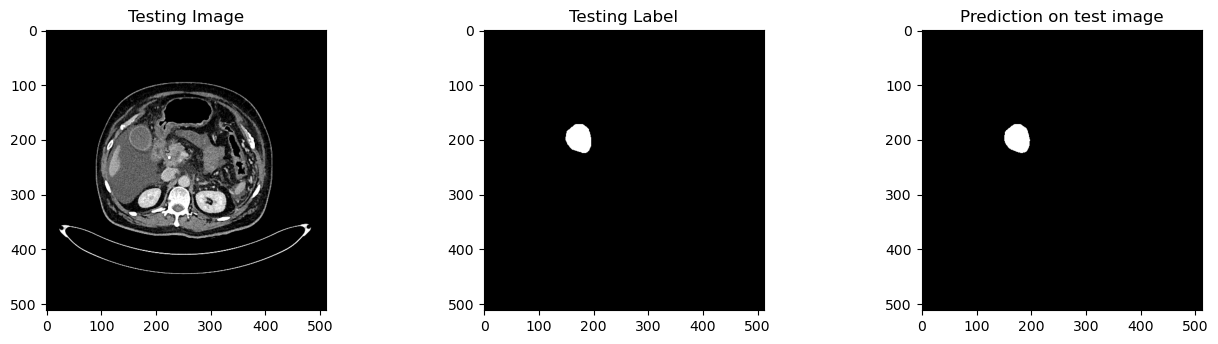

1/1 [==============================] - 0s 44ms/step


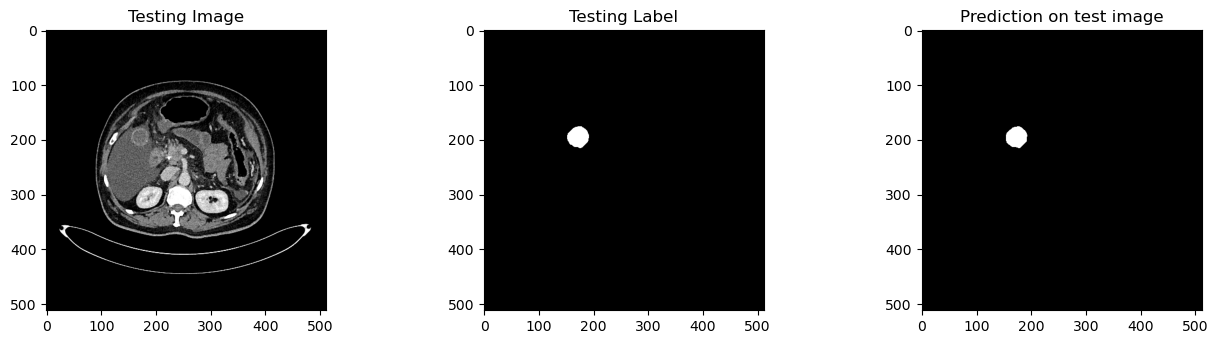

1/1 [==============================] - 0s 45ms/step


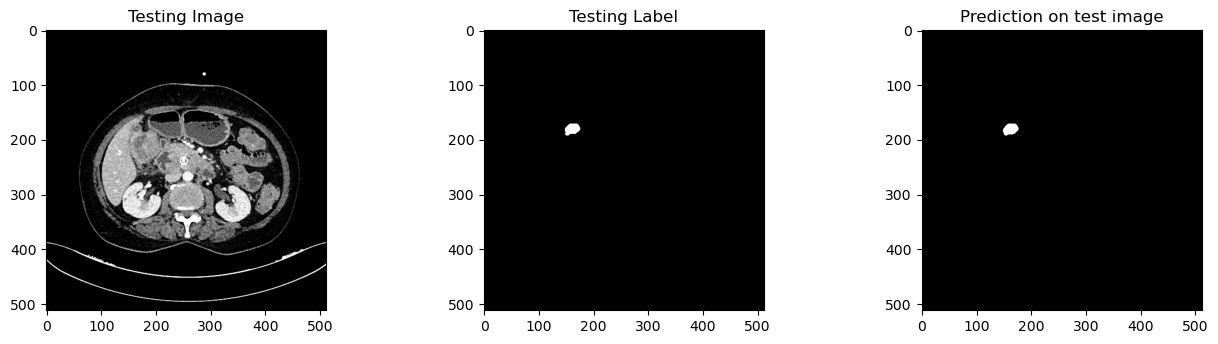

1/1 [==============================] - 0s 72ms/step


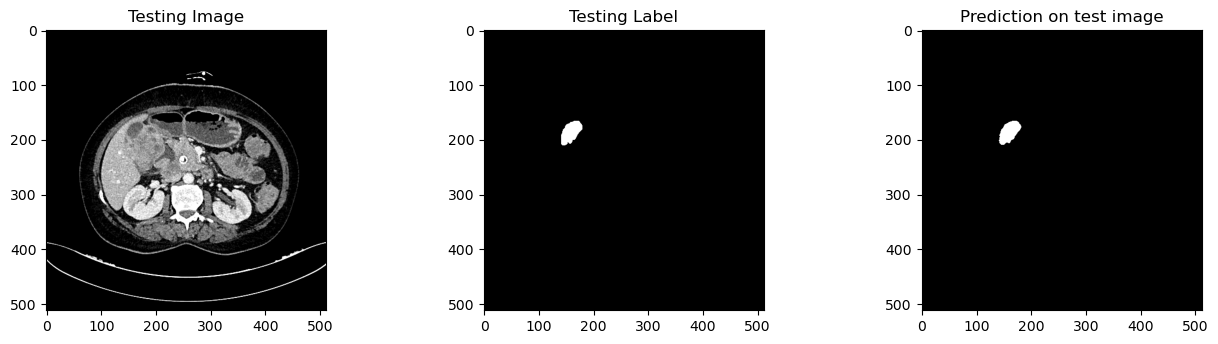

1/1 [==============================] - 0s 57ms/step


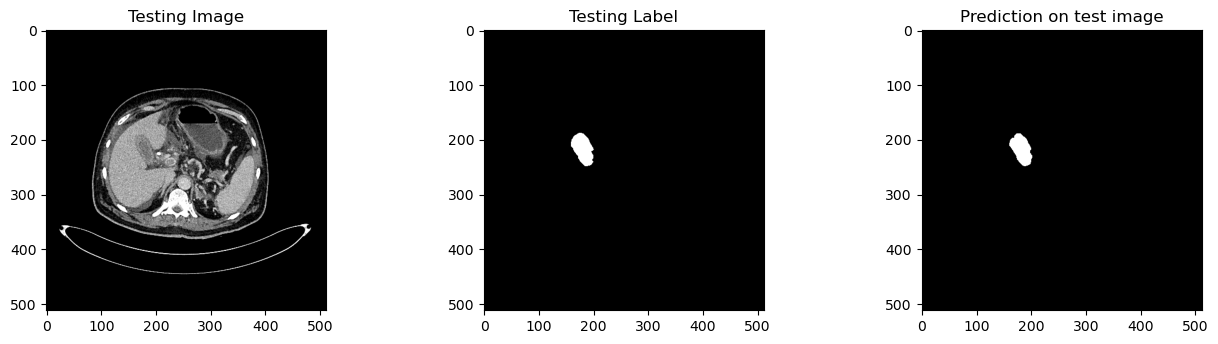

In [110]:
for i in range(5):
    test_img_number = random.randint(0, X_train.shape[0]-1)

    test_img = X_train[test_img_number]
    ground_truth=y_train[test_img_number]
    #test_img_norm=test_img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img, 0)
    prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img, cmap='gray')
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

In [109]:
#IoU for a single image
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())


#Calculate IoU and average
 
import pandas as pd

IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    #print(IoU)
    


df = pd.DataFrame(IoU_values, columns=["IoU"])
df = df[df.IoU != 1.0]    
mean_IoU = df.mean().values
print("Mean IoU is: ", mean_IoU) 

Mean IoU = 0.98016447
1/1 [==============================] - 0s 36ms/step
Mean IoU is:  [0.9428774]
